In [333]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# 01 | Data Extraction 

In [3]:
df = pd.read_csv('mental_health_dataset.csv')

In [5]:
df

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,Non-binary,Other,Germany,No,NaN,Yes,Low,9.3,50,0
996,997,31,Male,Sales,Canada,No,NaN,No,High,4.5,37,6
997,998,33,Female,IT,Germany,No,High,Yes,Medium,9.7,73,10
998,999,42,Female,Finance,Australia,Yes,NaN,No,Medium,6.5,79,8


In [84]:
df.shape

(1000, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Occupation               1000 non-null   object 
 4   Country                  1000 non-null   object 
 5   Mental_Health_Condition  1000 non-null   object 
 6   Severity                 499 non-null    object 
 7   Consultation_History     1000 non-null   object 
 8   Stress_Level             1000 non-null   object 
 9   Sleep_Hours              1000 non-null   float64
 10  Work_Hours               1000 non-null   int64  
 11  Physical_Activity_Hours  1000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [47]:
mental_condition = df.copy()

# 02 | Data Cleaning 

In [49]:
mental_condition.isna().sum()

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64

In [51]:
mental_condition.drop(columns='Severity', inplace=True)
# eliminamos la columna puesto que no nos sirve de ninguna ayuda para predecir el estaado mental del individuo y la variable se activa como condición de que la persona tenga problemas de salud mental

In [53]:
mental_condition.isna().sum()

User_ID                    0
Age                        0
Gender                     0
Occupation                 0
Country                    0
Mental_Health_Condition    0
Consultation_History       0
Stress_Level               0
Sleep_Hours                0
Work_Hours                 0
Physical_Activity_Hours    0
dtype: int64

In [31]:
mental_condition.duplicated().sum()

0

In [33]:
mental_condition.eq(" ").sum()

User_ID                    0
Age                        0
Gender                     0
Occupation                 0
Country                    0
Mental_Health_Condition    0
Severity                   0
Consultation_History       0
Stress_Level               0
Sleep_Hours                0
Work_Hours                 0
Physical_Activity_Hours    0
dtype: int64

# 03 | EDA

In [68]:
mental_condition.nunique()

User_ID                    1000
Age                          48
Gender                        4
Occupation                    7
Country                       7
Mental_Health_Condition       2
Consultation_History          2
Stress_Level                  3
Sleep_Hours                  61
Work_Hours                   51
Physical_Activity_Hours      11
dtype: int64

In [35]:
mental_condition.Mental_Health_Condition.value_counts()

Mental_Health_Condition
Yes    515
No     485
Name: count, dtype: int64

In [60]:
mental_condition.Gender.value_counts()

Gender
Female               270
Non-binary           267
Male                 247
Prefer not to say    216
Name: count, dtype: int64

In [37]:
mental_condition.describe()

,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.89200,7.095600,54.621000,5.134000
std,288.819436,13.97475,1.713861,14.709035,3.081808
min,1.000000,18.00000,4.000000,30.000000,0.000000
25%,250.750000,30.00000,5.600000,42.000000,3.000000
50%,500.500000,42.00000,7.100000,55.000000,5.000000
75%,750.250000,54.00000,8.500000,67.000000,8.000000
max,1000.000000,65.00000,10.000000,80.000000,10.000000


In [74]:
num_df = mental_condition.select_dtypes(include='number')
cat_df = mental_condition.select_dtypes(exclude='number')

In [150]:
num_df

,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,7.1,46,5
1,2,34,7.5,47,8
2,3,65,8.4,58,10
3,4,34,9.8,30,2
4,5,22,4.9,62,5
...,...,...,...,...,...
995,996,46,9.3,50,0
996,997,31,4.5,37,6
997,998,33,9.7,73,10
998,999,42,6.5,79,8


In [110]:
cat_df

,Gender,Occupation,Country,Mental_Health_Condition,Consultation_History,Stress_Level
0,Non-binary,Sales,Canada,No,Yes,Medium
1,Female,Education,UK,Yes,No,Low
2,Non-binary,Sales,USA,Yes,No,Low
3,Male,Other,Australia,No,No,Medium
4,Female,Healthcare,Canada,Yes,No,Medium
...,...,...,...,...,...,...
995,Non-binary,Other,Germany,No,Yes,Low
996,Male,Sales,Canada,No,No,High
997,Female,IT,Germany,No,Yes,Medium
998,Female,Finance,Australia,Yes,No,Medium


In [106]:
country_df = cat_df.Country.value_counts()

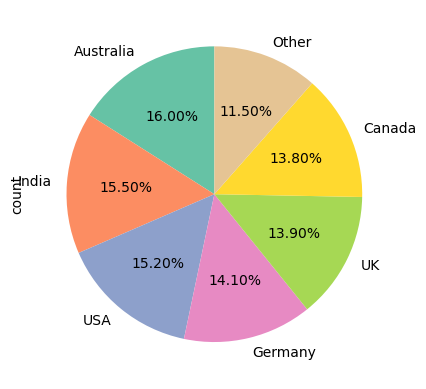

In [108]:
country_df.plot.pie(autopct='%1.2f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()

In [80]:
frequency_table = cat_df.Gender.value_counts()
proportion_table = cat_df.Gender.value_counts(normalize=True).round(2)

In [82]:
gender_df = pd.concat([frequency_table, proportion_table], axis=1)
gender_df

,count,proportion
Gender,,
Female,270,0.27
Non-binary,267,0.27
Male,247,0.25
Prefer not to say,216,0.22


In [88]:
pd.crosstab(index=cat_df.Gender,
           columns='count')

col_0,count
Gender,
Female,270
Male,247
Non-binary,267
Prefer not to say,216


C:\Users\georg\AppData\Local\Temp\ipykernel_28788\2111591722.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


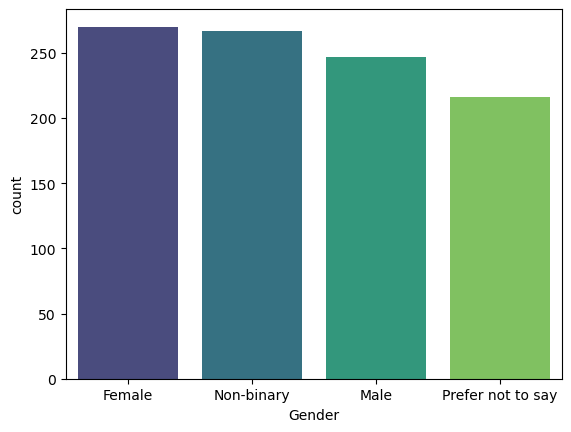

In [94]:
sns.barplot(
    x='Gender',
    y='count',
    data=gender_df,
    palette='viridis',
)
plt.show()

In [114]:
gender_condition = pd.crosstab(index=cat_df.Gender, columns=cat_df.Mental_Health_Condition)
gender_condition

Mental_Health_Condition,No,Yes
Gender,,
Female,126,144
Male,118,129
Non-binary,132,135
Prefer not to say,109,107


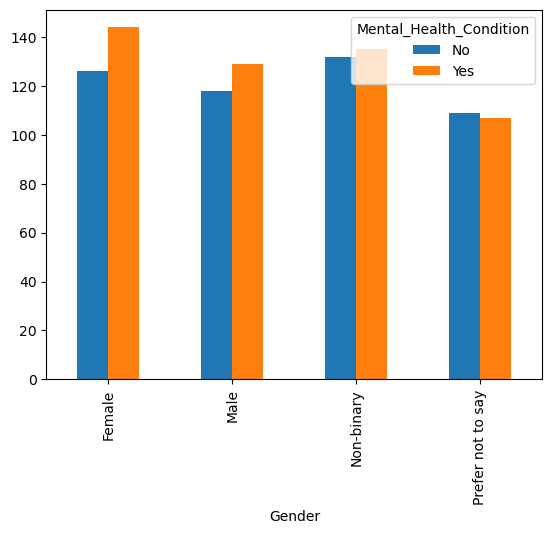

In [144]:
gender_condition.plot(kind='bar')
plt.show()

In [178]:
association(occupation_stress, method='cramer')

0.043249899341157395

In [136]:
country_condition = pd.crosstab(index=cat_df.Country, columns=cat_df.Mental_Health_Condition)
country_condition

Mental_Health_Condition,No,Yes
Country,,
Australia,87,73
Canada,59,79
Germany,74,67
India,70,85
Other,62,53
UK,67,72
USA,66,86


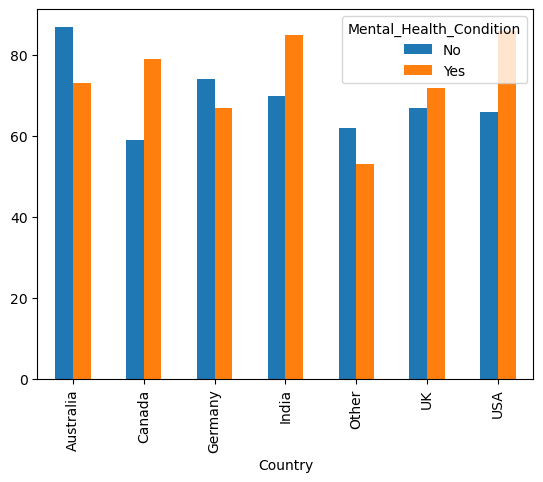

In [138]:
country_condition.plot(kind='bar')
plt.show()

In [146]:
occupation_stress = pd.crosstab(index=cat_df.Occupation, columns=cat_df.Stress_Level)
occupation_stress = occupation_stress.loc[:, ['Low', 'Medium', 'High']]
occupation_stress

Stress_Level,Low,Medium,High
Occupation,,,
Education,49,39,47
Engineering,47,47,54
Finance,47,47,45
Healthcare,53,47,49
IT,40,48,45
Other,53,49,59
Sales,49,43,43


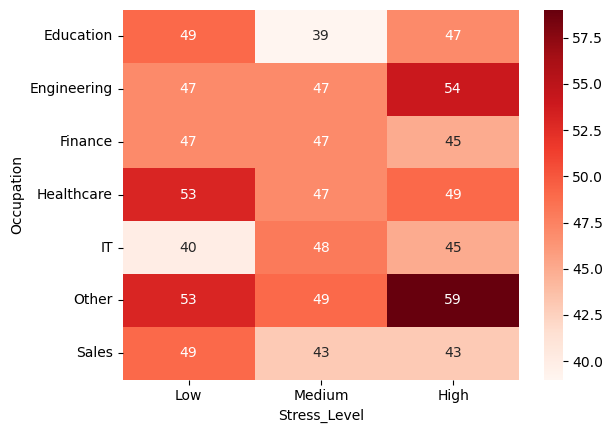

In [148]:
sns.heatmap(occupation_stress, annot=True, cmap="Reds", fmt="d")
plt.show()

In [186]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(occupation_stress)

In [188]:
chi2_pvalue
# There is no evidence to conclude that both variable are correlated

0.9876679360753796

In [152]:
historical_condition = pd.crosstab(index=cat_df.Consultation_History, columns=cat_df.Mental_Health_Condition)

In [162]:
chi2_pvalue

0.4804737848594981

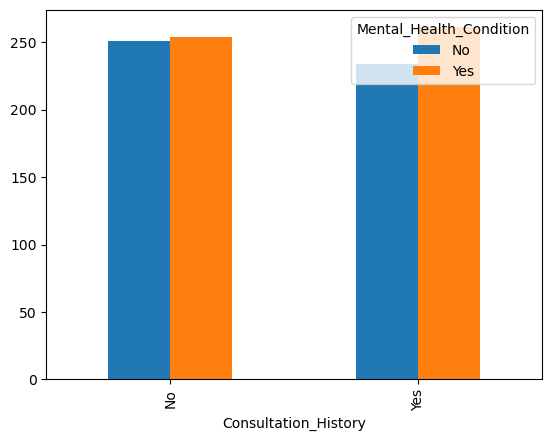

In [156]:
historical_condition.plot(kind='bar')
plt.show()

C:\Users\georg\AppData\Local\Temp\ipykernel_28788\3915591311.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mental_condition, x="Stress_Level", y="Physical_Activity_Hours", palette="coolwarm")


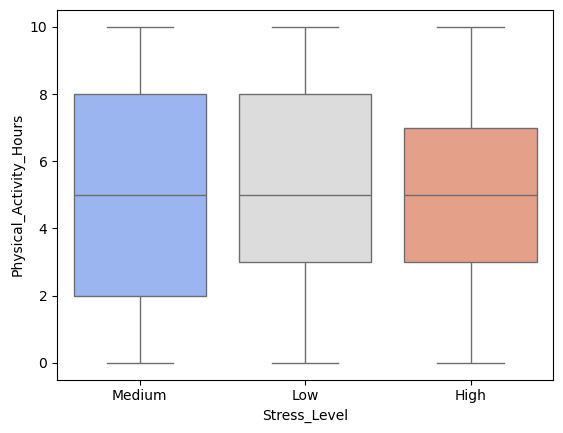

In [200]:
sns.boxplot(data=mental_condition, x="Stress_Level", y="Physical_Activity_Hours", palette="coolwarm")
plt.show()

In [228]:
mental_condition

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,No,Medium,4.9,62,5
...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,Non-binary,Other,Germany,No,Yes,Low,9.3,50,0
996,997,31,Male,Sales,Canada,No,No,High,4.5,37,6
997,998,33,Female,IT,Germany,No,Yes,Medium,9.7,73,10
998,999,42,Female,Finance,Australia,Yes,No,Medium,6.5,79,8


C:\Users\georg\AppData\Local\Temp\ipykernel_28788\822141811.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=mental_condition, x="Occupation", y="Physical_Activity_Hours", palette="coolwarm")


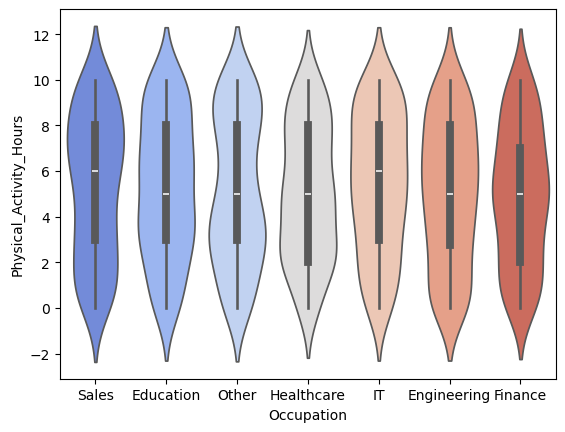

In [220]:
sns.violinplot(data=mental_condition, x="Occupation", y="Physical_Activity_Hours", palette="coolwarm")
plt.show()

C:\Users\georg\AppData\Local\Temp\ipykernel_28788\1028997919.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mental_condition, x="Mental_Health_Condition", y="Work_Hours", palette="coolwarm")


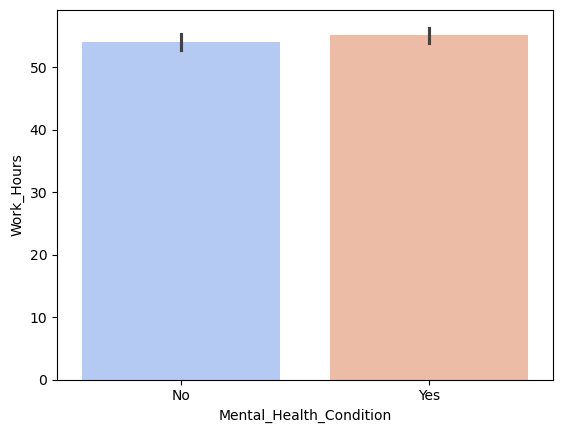

In [218]:
sns.barplot(data=mental_condition, x="Mental_Health_Condition", y="Work_Hours", palette="coolwarm")
plt.show()

C:\Users\georg\AppData\Local\Temp\ipykernel_28788\3854675778.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mental_condition, x="Stress_Level", y="Work_Hours", palette="coolwarm")


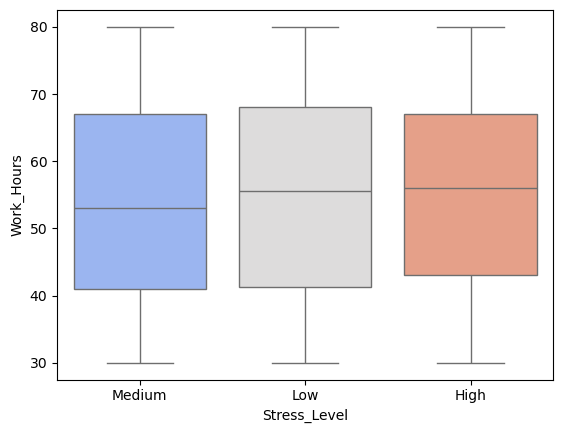

In [222]:
sns.boxplot(data=mental_condition, x="Stress_Level", y="Work_Hours", palette="coolwarm")
plt.show()

C:\Users\georg\AppData\Local\Temp\ipykernel_28788\4022612739.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mental_condition, x="Stress_Level", y="Sleep_Hours", palette="coolwarm")


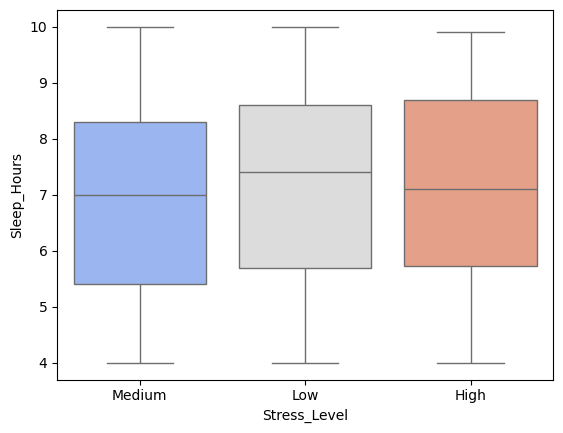

In [224]:
sns.boxplot(data=mental_condition, x="Stress_Level", y="Sleep_Hours", palette="coolwarm")
plt.show()

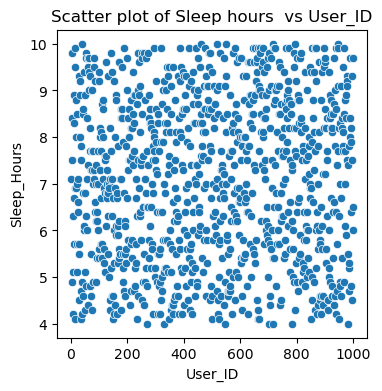

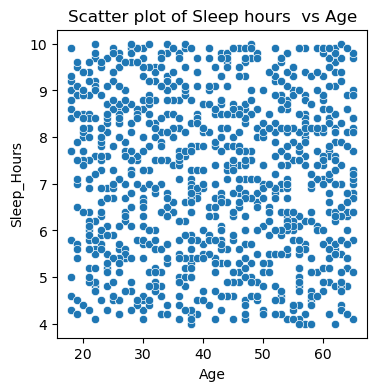

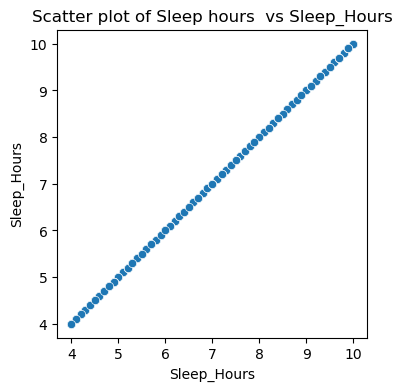

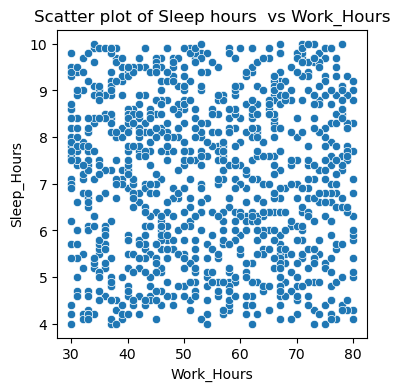

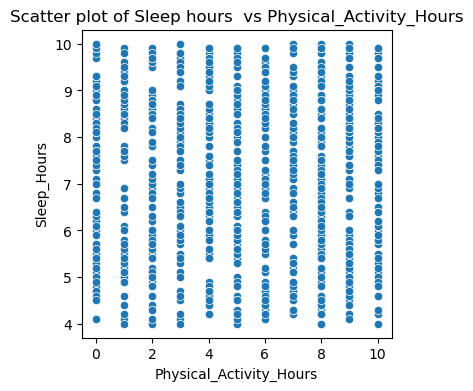

In [234]:
for col in num_df.columns:
    plt.figure(figsize=(4, 4))
    plt.title('Scatter plot of Sleep hours  vs ' + col)
    sns.scatterplot(data=num_df, x=col, y='Sleep_Hours')
    plt.show()

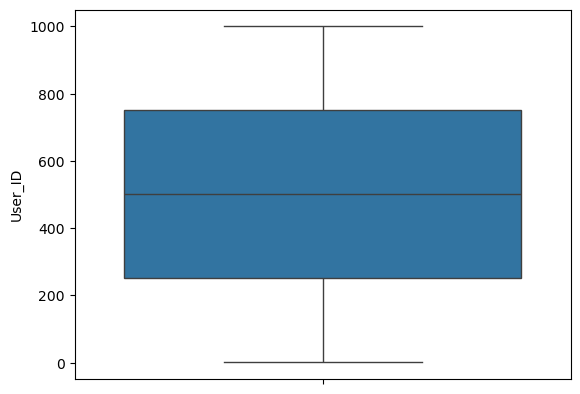

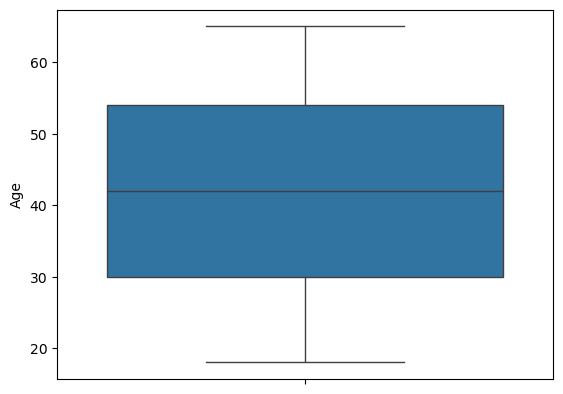

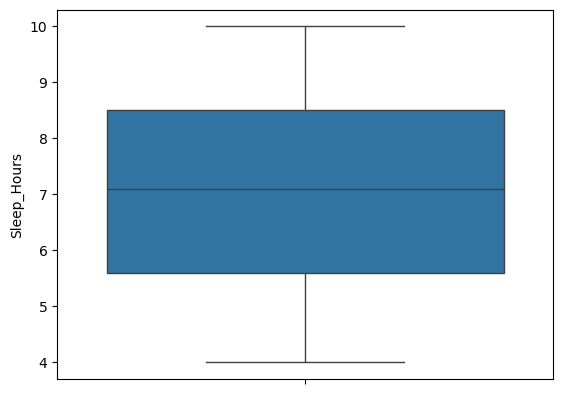

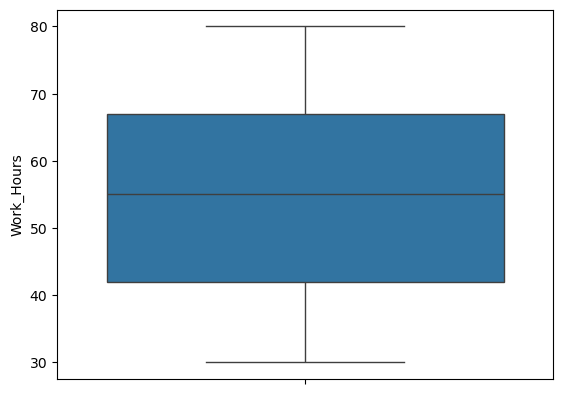

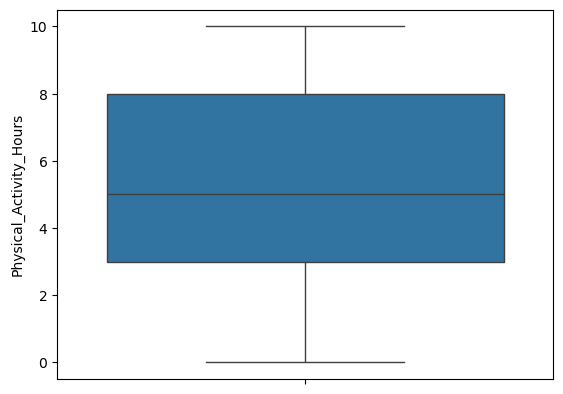

In [238]:
for col in num_df.columns:
    sns.boxplot(data=num_df, y=col)
    plt.show()

In [246]:
mapeo = {'Yes':1,
         'No':0
        }

In [248]:
mental_condition['Mental_Health_Condition'] = mental_condition['Mental_Health_Condition'].map(mapeo)

In [1278]:
correlation = num_df.corrwith(mental_condition['Mental_Health_Condition'], method='pearson').sort_values(ascending=False) # positive ones
correlation

Work_Hours                 0.04
Age                        0.01
Physical_Activity_Hours    0.01
Sleep_Hours               -0.03
User_ID                   -0.04
dtype: float64

In [262]:
round(num_df.corrwith(mental_condition["Mental_Health_Condition"]).sort_values(ascending=False),2)

Work_Hours                 0.04
Age                        0.01
Physical_Activity_Hours    0.01
Sleep_Hours               -0.03
User_ID                   -0.04
dtype: float64

In [264]:
mental_condition

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,0,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,1,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,1,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,0,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,1,No,Medium,4.9,62,5
...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,Non-binary,Other,Germany,0,Yes,Low,9.3,50,0
996,997,31,Male,Sales,Canada,0,No,High,4.5,37,6
997,998,33,Female,IT,Germany,0,Yes,Medium,9.7,73,10
998,999,42,Female,Finance,Australia,1,No,Medium,6.5,79,8


In [266]:
target = mental_condition.pop("Mental_Health_Condition")
mental_condition['Mental_Health_Condition'] = target

In [278]:
df2 = mental_condition.select_dtypes(include='number')

In [282]:
df2

,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Mental_Health_Condition
0,1,36,7.1,46,5,0
1,2,34,7.5,47,8,1
2,3,65,8.4,58,10,1
3,4,34,9.8,30,2,0
4,5,22,4.9,62,5,1
...,...,...,...,...,...,...
995,996,46,9.3,50,0,0
996,997,31,4.5,37,6,0
997,998,33,9.7,73,10,0
998,999,42,6.5,79,8,1


In [1282]:
num_corr = df2.corr().round(2)

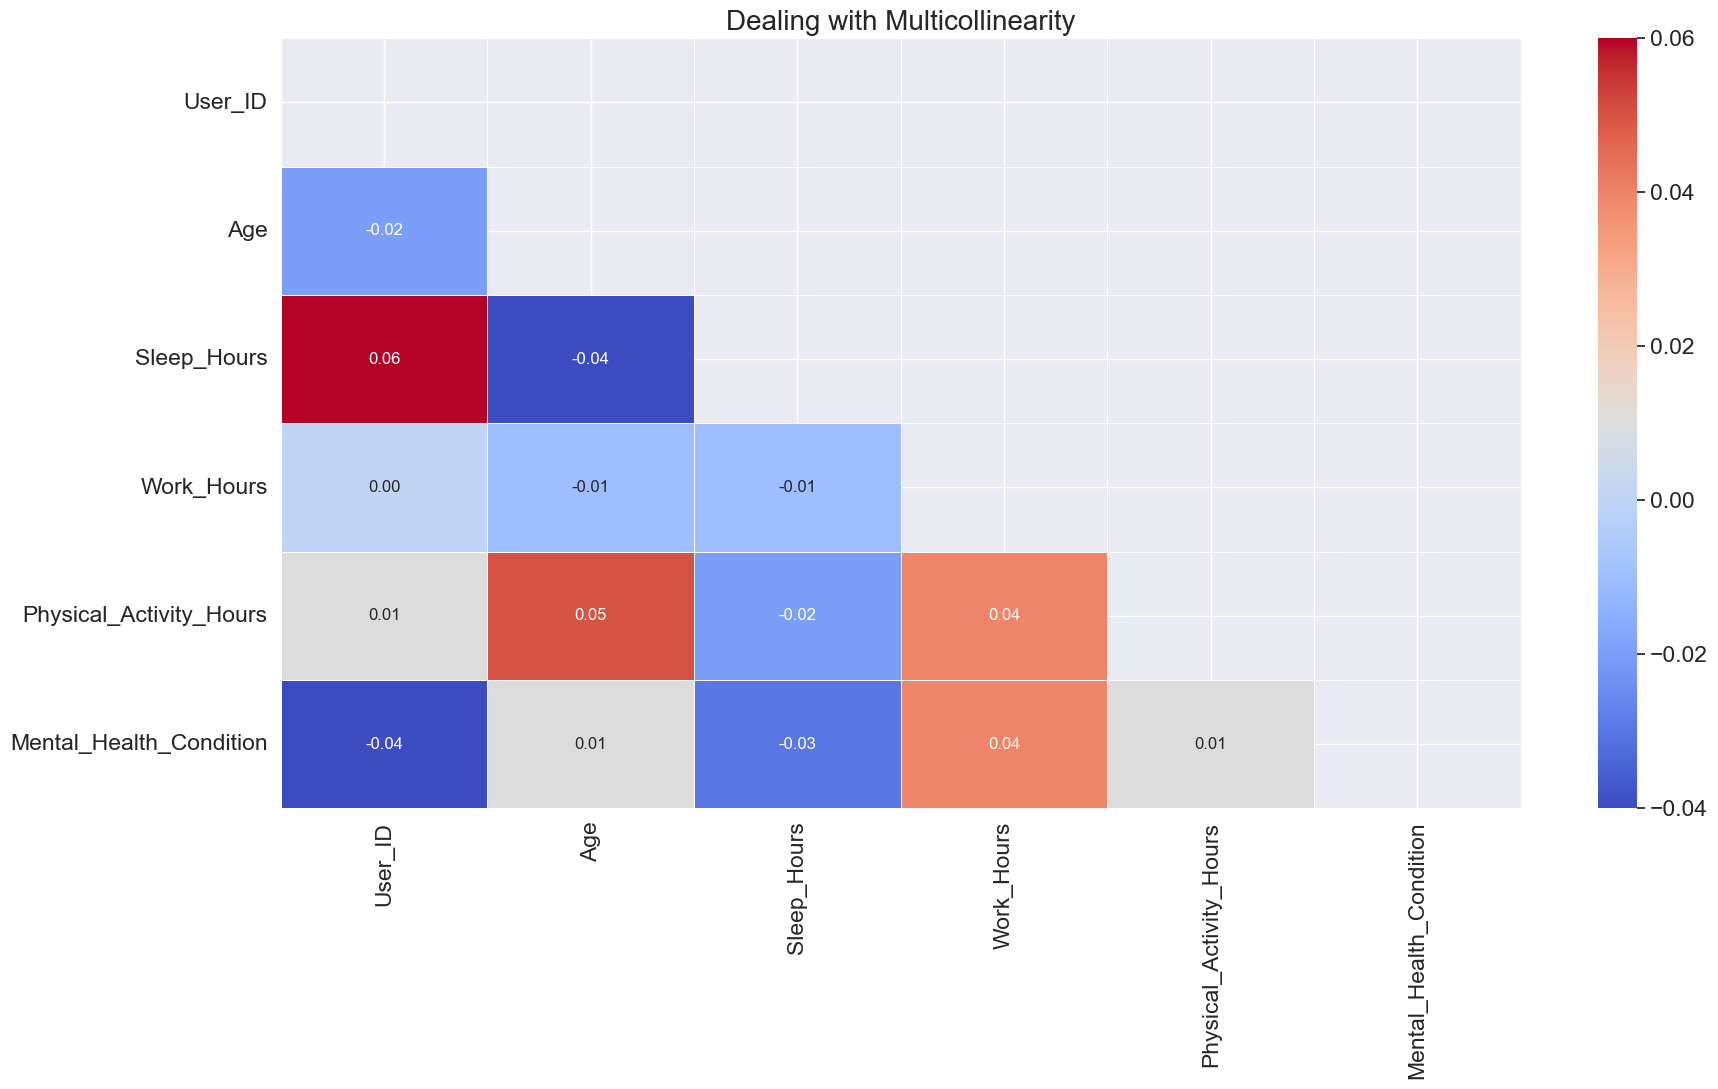

In [1304]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [302]:
mental_condition

,User_ID,Age,Gender,Occupation,Country,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Mental_Health_Condition
0,1,36,Non-binary,Sales,Canada,1,1,7.1,46,5,0
1,2,34,Female,Education,UK,0,0,7.5,47,8,1
2,3,65,Non-binary,Sales,USA,0,0,8.4,58,10,1
3,4,34,Male,Other,Australia,0,1,9.8,30,2,0
4,5,22,Female,Healthcare,Canada,0,1,4.9,62,5,1
...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,Non-binary,Other,Germany,1,0,9.3,50,0,0
996,997,31,Male,Sales,Canada,0,2,4.5,37,6,0
997,998,33,Female,IT,Germany,1,1,9.7,73,10,0
998,999,42,Female,Finance,Australia,0,1,6.5,79,8,1


In [294]:
mapeo1 = {'Low':0,
          'Medium':1,
          'High':2
         }

In [296]:
mental_condition['Stress_Level'] = mental_condition['Stress_Level'].map(mapeo1)

In [300]:
mental_condition['Consultation_History'] = mental_condition['Consultation_History'].map(mapeo)

In [304]:
categorical_columns = ['Gender', 'Occupation', 'Country']

In [491]:
df3 = pd.get_dummies(mental_condition, columns=categorical_columns, drop_first=True)

In [830]:
df4 = df3.astype(int)

In [832]:
df4.columns

Index(['User_ID', 'Age', 'Consultation_History', 'Stress_Level', 'Sleep_Hours',
       'Work_Hours', 'Physical_Activity_Hours', 'Mental_Health_Condition',
       'Gender_Male', 'Gender_Non-binary', 'Gender_Prefer not to say',
       'Occupation_Engineering', 'Occupation_Finance', 'Occupation_Healthcare',
       'Occupation_IT', 'Occupation_Other', 'Occupation_Sales',
       'Country_Canada', 'Country_Germany', 'Country_India', 'Country_Other',
       'Country_UK', 'Country_USA'],
      dtype='object')

In [808]:
df4.drop(columns=['Gender_Prefer not to say', 'Gender_Non-binary', 'User_ID'], inplace=True)

In [834]:
num_corr1 = df4.corr().round(2)

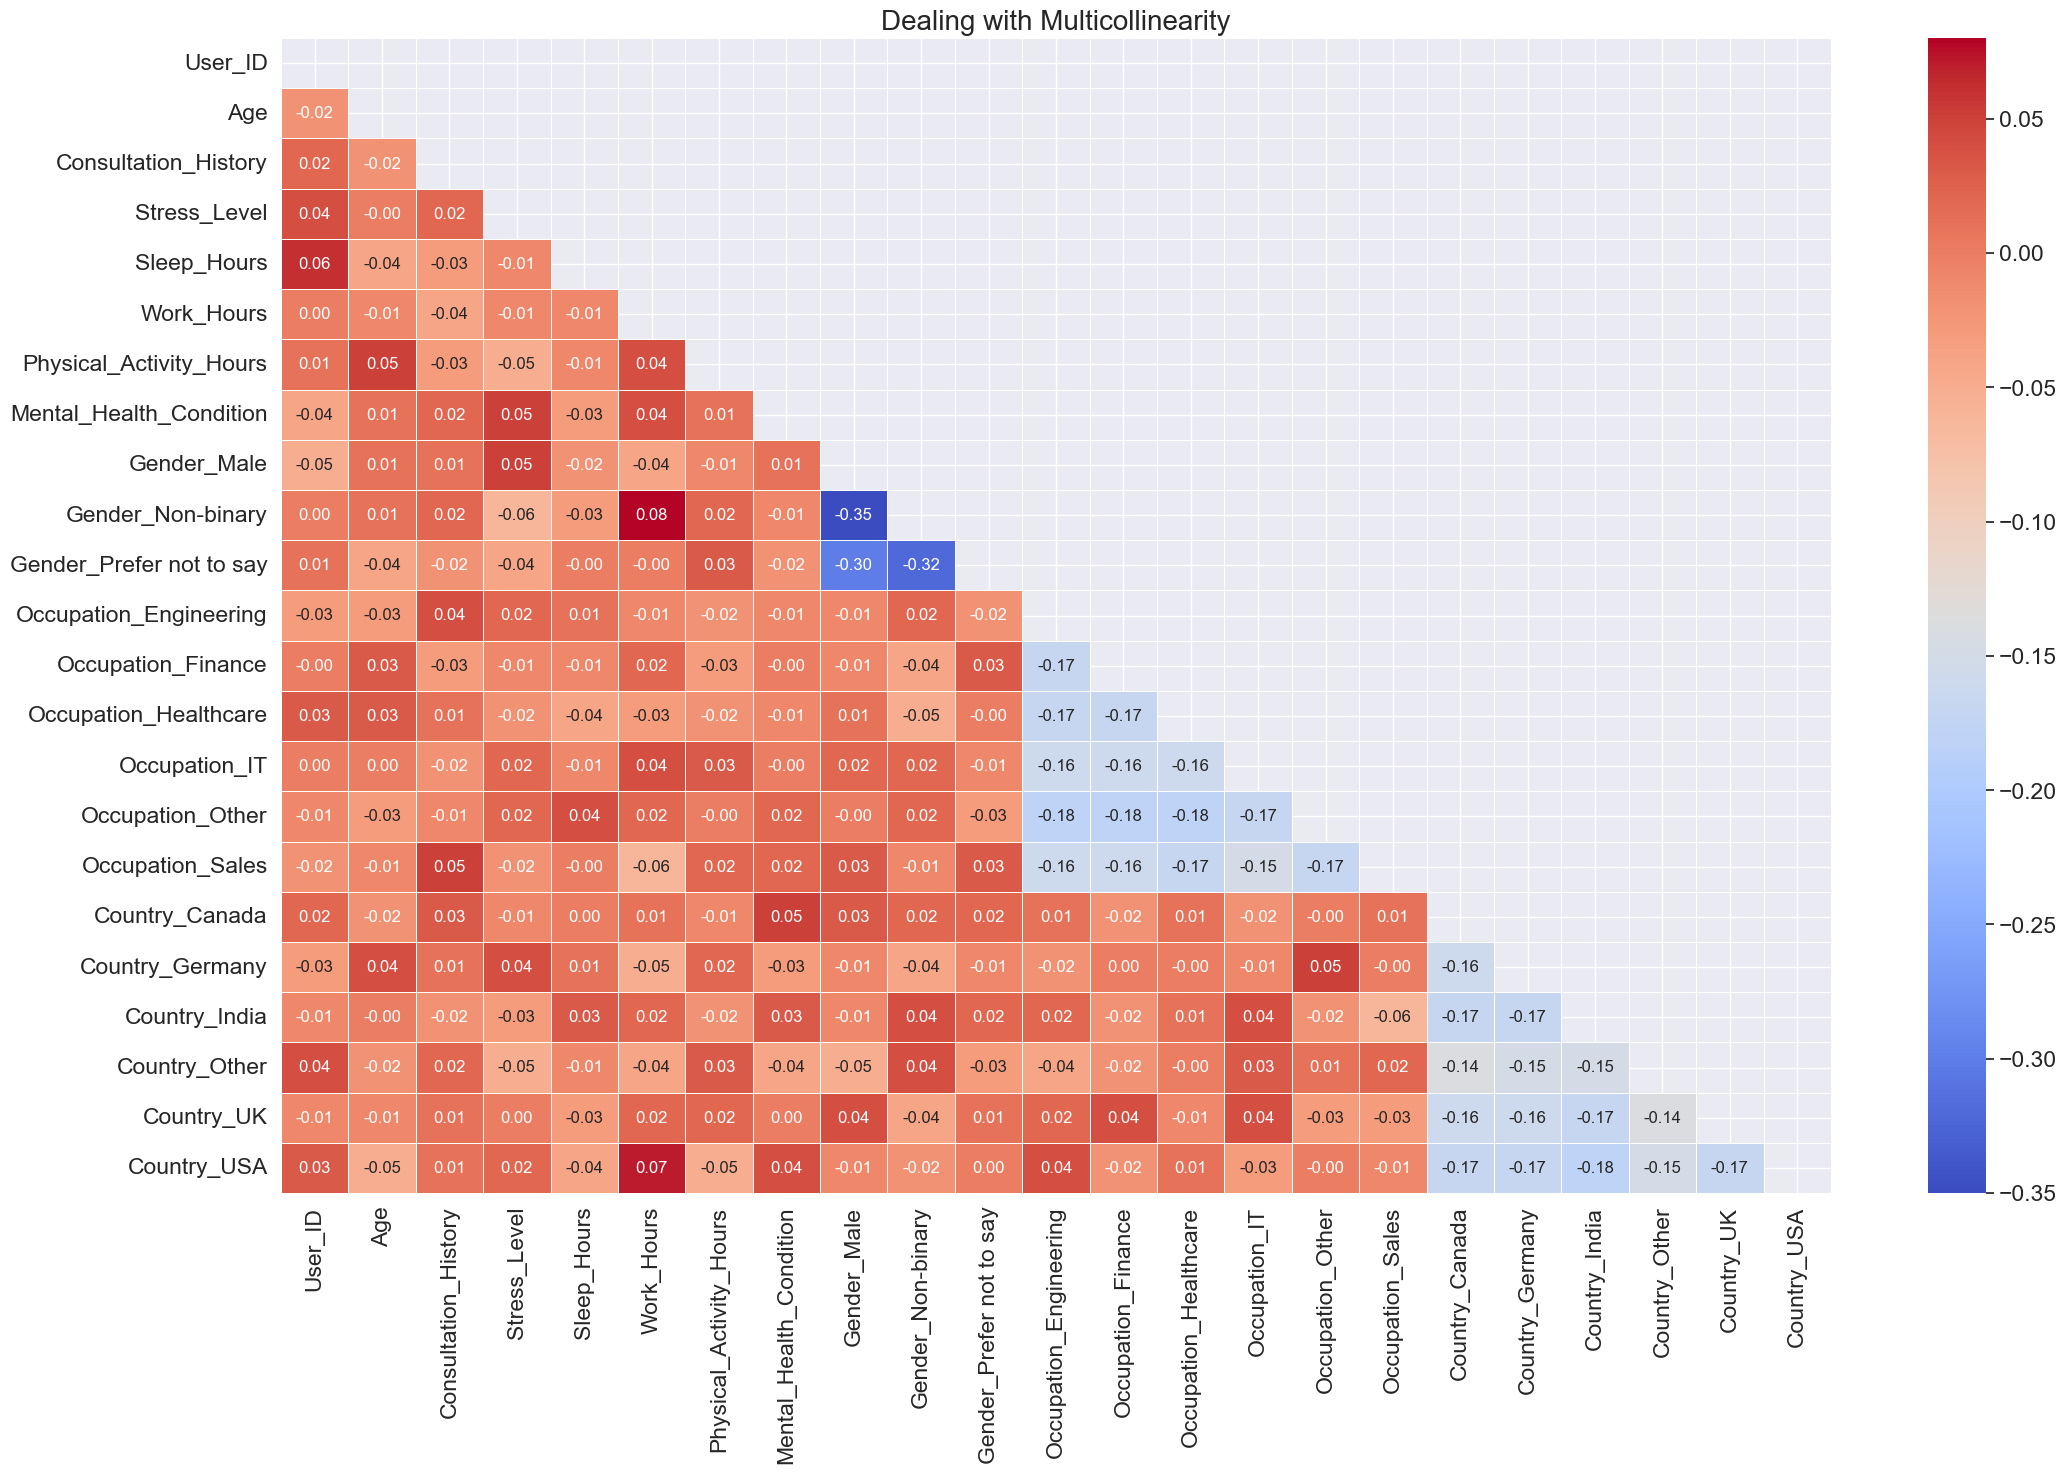

In [836]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr1)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr1, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

# 04 | Data Preprocessing

In [1164]:
y = df4['Mental_Health_Condition']
X = df4[['Age', 'Consultation_History', 'Stress_Level', 'Sleep_Hours',
       'Work_Hours', 'Physical_Activity_Hours',
       'Gender_Male', 'Gender_Prefer not to say',
       'Occupation_Engineering', 'Occupation_Finance', 'Occupation_Healthcare',
       'Occupation_IT', 'Occupation_Other', 'Occupation_Sales',
       'Country_Canada', 'Country_Germany', 'Country_India', 'Country_Other',
       'Country_UK', 'Country_USA']]

# 05 | Modeling & Reporting

In [1166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [1306]:
print(f'100% of our data: {len(df4)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 1000.
70% for training data: 700.
30% for test data: 300.


In [1198]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [1200]:
predictions = model.predict(X_test)

In [1202]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.49      0.39      0.44       145
           1       0.52      0.61      0.56       155

    accuracy                           0.51       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.51      0.50       300



In [1204]:
accuracy = model.score(X_test,y_test)
accuracy

0.5066666666666667

In [1020]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

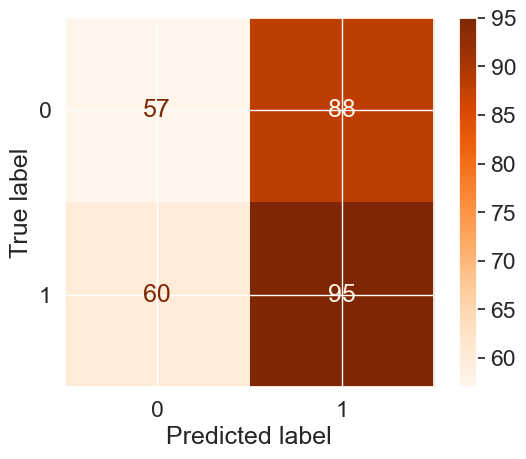

In [1022]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')
plt.grid(True)
plt.show()

In [1206]:
from sklearn.neighbors import KNeighborsClassifier
kneighbours = KNeighborsClassifier(n_neighbors=17)

In [1208]:
kneighbours.fit(X_train, y_train)
predictions1 = model.predict(X_test)
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.49      0.39      0.44       145
           1       0.52      0.61      0.56       155

    accuracy                           0.51       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.51      0.50       300



In [1210]:
print("Test data accuracy: ",kneighbours.score(X_test,y_test))
print("Train data accuracy: ", kneighbours.score(X_train, y_train))

Test data accuracy:  0.5066666666666667
Train data accuracy:  0.6171428571428571


In [1212]:
KNN = model.score(X_test,y_test)
KNN

0.5066666666666667

In [1046]:
cm = confusion_matrix(y_test, predictions1)

<Figure size 800x600 with 0 Axes>

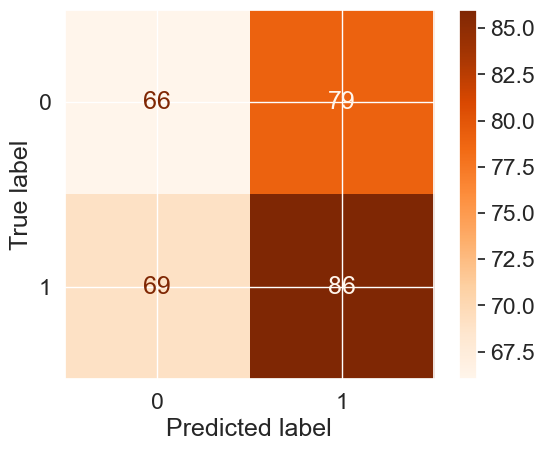

In [1048]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')
plt.grid(True)
plt.show()

In [1034]:
n_neighbors = range(1, 30)
test = []
train = []

for neighbors in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=neighbors)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

In [1036]:
import plotly.graph_objs as go

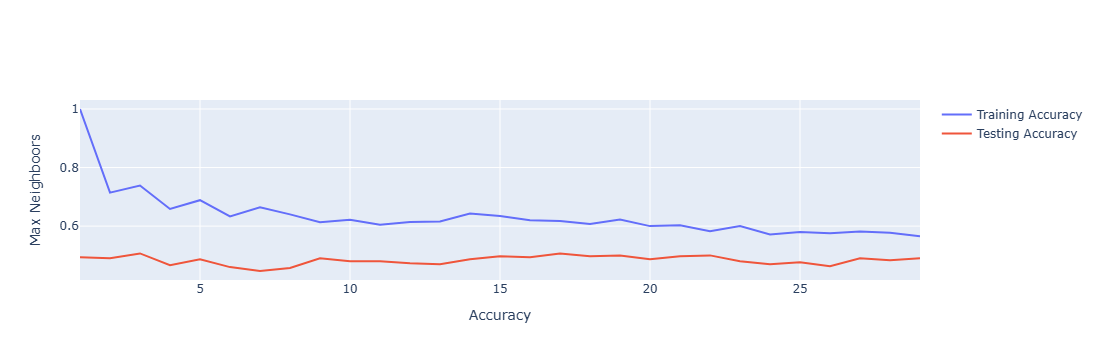

In [1038]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(n_neighbors), y=train, name='Training Accuracy'))
fig.add_trace(go.Scatter(x=list(n_neighbors), y=test, name='Testing Accuracy'))
fig.update_layout(xaxis_title='Accuracy', yaxis_title='Max Neighboors', title='')
fig.show()

In [1182]:
from sklearn.tree import DecisionTreeClassifier

In [1214]:
dtree = DecisionTreeClassifier(max_depth=17)
dtree.fit(X_train, y_train)
predictions2 = dtree.predict(X_test)

In [1216]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.49      0.50      0.49       145
           1       0.52      0.51      0.51       155

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300



In [1218]:
print("Test data accuracy: ",dtree.score(X_test,y_test))
print("Train data accuracy: ", dtree.score(X_train, y_train))

Test data accuracy:  0.5033333333333333
Train data accuracy:  1.0


In [1220]:
decision_tree = dtree.score(X_test,y_test)
decision_tree

0.5033333333333333

In [1058]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

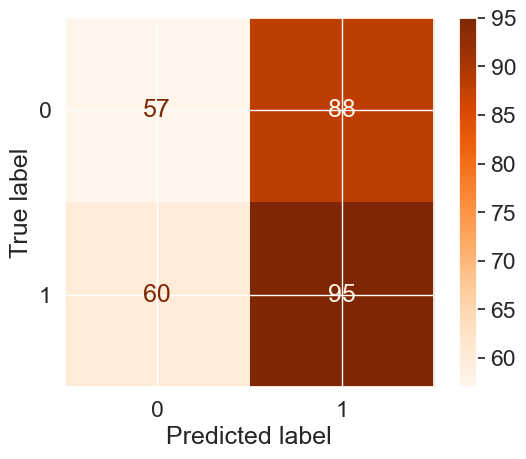

In [1062]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')
plt.grid(True)
plt.show()

In [423]:
max_depth = range(1, 30)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth= depth)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

In [425]:
import plotly.graph_objs as go

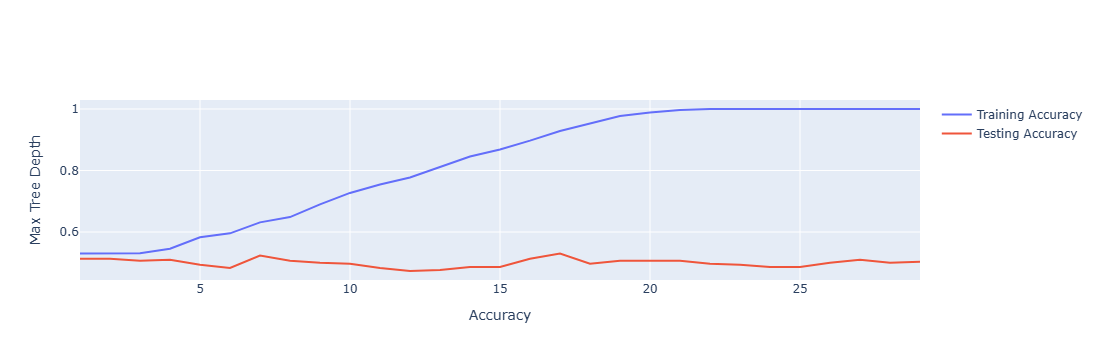

In [427]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(max_depth), y=train, name='Training Accuracy'))
fig.add_trace(go.Scatter(x=list(max_depth), y=test, name='Testing Accuracy'))
fig.update_layout(xaxis_title='Accuracy', yaxis_title='Max Tree Depth', title='')
fig.show()

In [1082]:
df3.drop(columns='User_ID', inplace=True)

In [1078]:
df3.drop(columns='Gender_Non-binary', inplace=True)

In [1084]:
df3

,Age,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Mental_Health_Condition,Gender_Male,Gender_Prefer not to say,Occupation_Engineering,...,Occupation_Healthcare,Occupation_IT,Occupation_Other,Occupation_Sales,Country_Canada,Country_Germany,Country_India,Country_Other,Country_UK,Country_USA
0,36,1,1,7.10,46,5,0,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,34,0,0,7.50,47,8,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,65,0,0,8.40,58,10,1,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,34,0,1,9.80,30,2,0,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,22,0,1,4.90,62,5,1,False,False,False,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,46,1,0,9.30,50,0,0,False,False,False,...,False,False,True,False,False,True,False,False,False,False
996,31,0,2,4.50,37,6,0,True,False,False,...,False,False,False,True,True,False,False,False,False,False
997,33,1,1,9.70,73,10,0,False,False,False,...,False,True,False,False,False,True,False,False,False,False
998,42,0,1,6.50,79,8,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1086]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=1, ignore_warnings=True,custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

 10%|█         | 3/29 [00:00<00:01, 14.13it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.5433333333333333, 'Balanced Accuracy': 0.5380422691879867, 'ROC AUC': 0.5380422691879866, 'F1 Score': 0.5313969713999533, 'Time taken': 0.12999892234802246}
{'Model': 'BaggingClassifier', 'Accuracy': 0.49333333333333335, 'Balanced Accuracy': 0.4956618464961068, 'ROC AUC': 0.4956618464961068, 'F1 Score': 0.4909847269269626, 'Time taken': 0.0800783634185791}
{'Model': 'BernoulliNB', 'Accuracy': 0.53, 'Balanced Accuracy': 0.5258064516129033, 'ROC AUC': 0.5258064516129032, 'F1 Score': 0.5224342321697996, 'Time taken': 0.016980886459350586}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.5433333333333333, 'Balanced Accuracy': 0.5347052280311457, 'ROC AUC': 0.5347052280311457, 'F1 Score': 0.5100411898946389, 'Time taken': 0.048940181732177734}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.5133333333333333, 'Balanced Accuracy': 0.5114571746384873, 'ROC AUC': 0.5114571746384873, 'F1 Score': 0.5118980591923976, 'Time taken': 0.0179958343505859

 28%|██▊       | 8/29 [00:00<00:00, 28.24it/s]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.5166666666666667, 'Balanced Accuracy': 0.5171301446051167, 'ROC AUC': 0.5171301446051167, 'F1 Score': 0.516715000537043, 'Time taken': 0.020885705947875977}


 38%|███▊      | 11/29 [00:00<00:01, 15.38it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.5233333333333333, 'Balanced Accuracy': 0.5229143492769744, 'ROC AUC': 0.5229143492769746, 'F1 Score': 0.5233810429386447, 'Time taken': 0.20613837242126465}
{'Model': 'GaussianNB', 'Accuracy': 0.5133333333333333, 'Balanced Accuracy': 0.5114571746384873, 'ROC AUC': 0.5114571746384873, 'F1 Score': 0.5118980591923976, 'Time taken': 0.02799701690673828}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.49, 'Balanced Accuracy': 0.4906562847608454, 'ROC AUC': 0.4906562847608454, 'F1 Score': 0.4899376659740664, 'Time taken': 0.09266948699951172}
{'Model': 'LabelPropagation', 'Accuracy': 0.5033333333333333, 'Balanced Accuracy': 0.5026696329254727, 'ROC AUC': 0.5026696329254727, 'F1 Score': 0.5032725479070008, 'Time taken': 0.06973743438720703}


 62%|██████▏   | 18/29 [00:00<00:00, 19.27it/s]

{'Model': 'LabelSpreading', 'Accuracy': 0.5066666666666667, 'Balanced Accuracy': 0.5058954393770857, 'ROC AUC': 0.5058954393770856, 'F1 Score': 0.5065349002849003, 'Time taken': 0.0630028247833252}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.51, 'Balanced Accuracy': 0.5066740823136818, 'ROC AUC': 0.5066740823136819, 'F1 Score': 0.5051703745423824, 'Time taken': 0.01699519157409668}
{'Model': 'LinearSVC', 'Accuracy': 0.51, 'Balanced Accuracy': 0.5066740823136818, 'ROC AUC': 0.5066740823136819, 'F1 Score': 0.5051703745423824, 'Time taken': 0.0430903434753418}
{'Model': 'LogisticRegression', 'Accuracy': 0.51, 'Balanced Accuracy': 0.5066740823136818, 'ROC AUC': 0.5066740823136819, 'F1 Score': 0.5051703745423824, 'Time taken': 0.023625612258911133}
{'Model': 'NearestCentroid', 'Accuracy': 0.53, 'Balanced Accuracy': 0.5298109010011124, 'ROC AUC': 0.5298109010011124, 'F1 Score': 0.5301097264065991, 'Time taken': 0.01699233055114746}
{'Model': 'NuSVC', 'Accuracy': 0.57, 'Balanced Acc

 90%|████████▉ | 26/29 [00:01<00:00, 18.45it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.5066666666666667, 'Balanced Accuracy': 0.5052280311457175, 'ROC AUC': 0.5052280311457175, 'F1 Score': 0.5058744814666132, 'Time taken': 0.26016831398010254}
{'Model': 'RidgeClassifier', 'Accuracy': 0.51, 'Balanced Accuracy': 0.5066740823136818, 'ROC AUC': 0.5066740823136819, 'F1 Score': 0.5051703745423824, 'Time taken': 0.032003164291381836}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.5133333333333333, 'Balanced Accuracy': 0.5098998887652948, 'ROC AUC': 0.5098998887652948, 'F1 Score': 0.5081980519480519, 'Time taken': 0.030001163482666016}
{'Model': 'SGDClassifier', 'Accuracy': 0.5, 'Balanced Accuracy': 0.4945494994438265, 'ROC AUC': 0.4945494994438265, 'F1 Score': 0.4863579991732121, 'Time taken': 0.025028228759765625}
{'Model': 'SVC', 'Accuracy': 0.49666666666666665, 'Balanced Accuracy': 0.4937708565072303, 'ROC AUC': 0.4937708565072303, 'F1 Score': 0.49298659388956906, 'Time taken': 0.059969425201416016}


100%|██████████| 29/29 [00:01<00:00, 16.57it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.5266666666666666, 'Balanced Accuracy': 0.525027808676307, 'ROC AUC': 0.5250278086763069, 'F1 Score': 0.5256101190476191, 'Time taken': 0.14499855041503906}
[LightGBM] [Info] Number of positive: 360, number of negative: 340
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514286 -> initscore=0.057158
[LightGBM] [Info] Start training from score 0.057158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [1222]:
from sklearn.svm import NuSVC

In [1224]:
model_nusvc = NuSVC()
model_nusvc.fit(X_train, y_train)
predictions_nusvc = model_nusvc.predict(X_test)

In [1226]:
print(classification_report(y_test, predictions_nusvc))

              precision    recall  f1-score   support

           0       0.50      0.39      0.44       145
           1       0.53      0.64      0.58       155

    accuracy                           0.52       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.51      0.52      0.51       300



In [1228]:
nusvc = model_nusvc.score(X_test,y_test)
nusvc

0.5166666666666667

In [1230]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [1232]:
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_test_scaled = scaler_minmax.transform(X_test)

In [1234]:
model_nusvc = NuSVC()
model_nusvc.fit(X_scaled_minmax, y_train)
predictions_nusvc = model_nusvc.predict(X_test_scaled)

In [1236]:
print(classification_report(y_test, predictions_nusvc))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52       145
           1       0.56      0.60      0.58       155

    accuracy                           0.55       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.55      0.55      0.55       300



In [1238]:
minmax =  model_nusvc.score(X_test_scaled,y_test)
minmax

0.5533333333333333

In [1240]:
scaler_std = StandardScaler()
X_scaled_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

In [1242]:
model_nusvc = NuSVC()
model_nusvc.fit(X_scaled_std, y_train)
predictions_nusvc = model_nusvc.predict(X_test_std)

In [1244]:
print(classification_report(y_test, predictions_nusvc))

              precision    recall  f1-score   support

           0       0.56      0.55      0.55       145
           1       0.58      0.59      0.59       155

    accuracy                           0.57       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.57      0.57      0.57       300



In [1246]:
std = model_nusvc.score(X_test_std,y_test)
std

0.57

In [1002]:
cm = confusion_matrix(y_test, predictions_nusvc)

<Figure size 800x600 with 0 Axes>

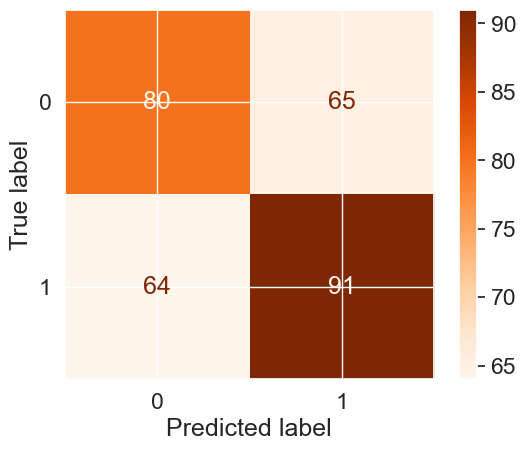

In [1004]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')
plt.grid(True)
plt.show()

In [1260]:
metrics = {
    'Model': ['Logistic Regression', 'KNeighbours', 'Decision Tree', 'NuSVC', 'MinMaxScaler', 'StandardScaler'],
    'Score': [accuracy, KNN, decision_tree, nusvc, minmax, std]
}

In [1262]:
mental_metrics = pd.DataFrame(metrics)
mental_metrics.set_index("Model", inplace=True)

In [1264]:
mental_metrics

,Score
Model,
Logistic Regression,0.51
KNeighbours,0.51
Decision Tree,0.50
NuSVC,0.52
MinMaxScaler,0.55
StandardScaler,0.57
